## <b> General Imports </b> ##

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## GeoJson Data (Boston) ##
Note: The unique identifier used here is 'PID_LONG' which exists in both dataframes.

In [12]:
# loading the GeoJSON data into a GeoDataFrame
gdf = gpd.read_file('geo/parcels.geojson')
# previewing the first entries of the dataframe
gdf.head()

,OBJECTID,MAP_PAR_ID,LOC_ID,POLY_TYPE,MAP_NO,SOURCE,PLAN_ID,LAST_EDIT,BND_CHK,NO_MATCH,...,PID_LONG,WPD,BATCH,Shape__Length_1,Shape__Area_1,Shape__Length_12,Shape__Area_12,Shape__Area,Shape__Length,geometry
0,1,1809294000,F_757219_2916180,FEE,18,ASSESS,None,20191107,None,N,...,1809294000,18-18-092,NaN,None,None,None,None,5061.115234,300.581750,"POLYGON ((-71.12656 42.24957, -71.12662 42.249..."
1,2,1803009001,F_765315_2926000,FEE,18,ASSESS,None,20191107,None,N,...,1803009001,18-03-085,NaN,None,None,None,None,44.310303,27.178744,"POLYGON ((-71.09668 42.27639, -71.09669 42.276..."
2,3,1400155000,F_771489_2939043,FEE,14,ASSESS,None,20191107,None,N,...,1400155000,14-01-010,NaN,None,None,None,None,2347.443359,274.308351,"POLYGON ((-71.07343 42.31205, -71.07347 42.312..."
3,4,1400355000,F_771316_2937979,FEE,14,ASSESS,None,20191107,None,N,...,1400355000,14-01-070,NaN,None,None,None,None,2969.015869,228.796861,"POLYGON ((-71.07423 42.30911, -71.07425 42.309..."
4,5,2101470000,F_754921_2951546,FEE,21,ASSESS,None,20191107,None,N,...,2101470000,21-08-050,NaN,None,None,None,None,5446.426025,302.794311,"POLYGON ((-71.13449 42.34662, -71.13470 42.346..."


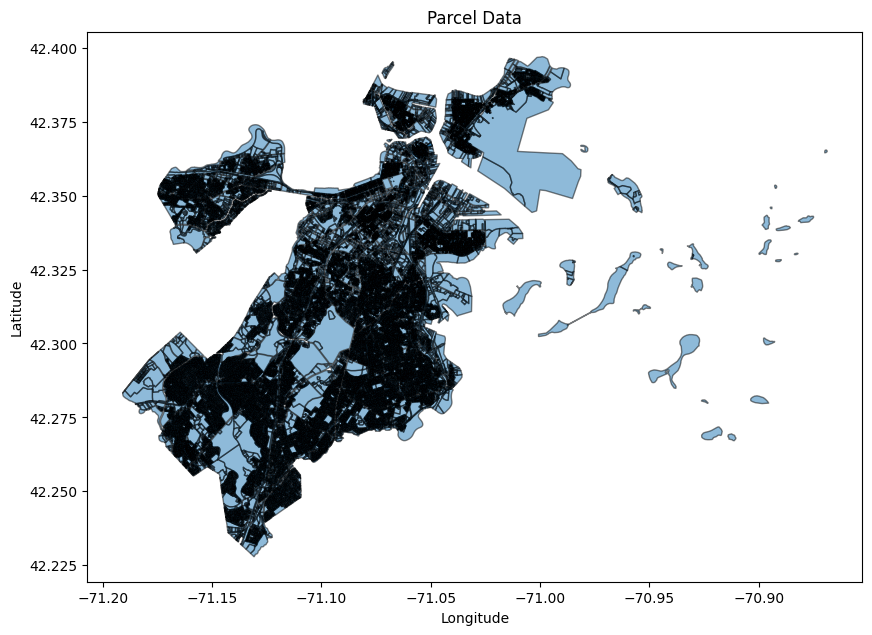

In [3]:
# Plot the parcels
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', alpha=0.5)
plt.title('Parcel Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

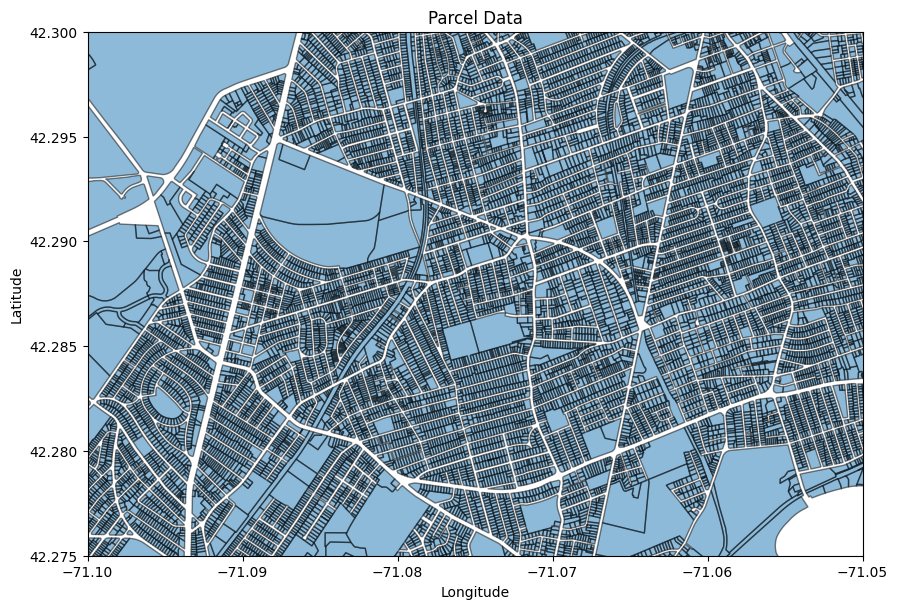

In [4]:
# Plot the parcels
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, edgecolor='black', alpha=0.5)
plt.title('Parcel Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(left=-71.1,right=-71.05)
plt.ylim(bottom=42.275,top=42.300)
plt.show()

## <b> Land-Use DataFrame </b> ##
The noteworthy variables in this dataframe are 'PID', 'GIS_ID', 'LUC', and 'NUM_PARKING'

In [9]:
# load property assesment data frame
propDf = pd.read_csv('geo/prop2023.csv')
# check out the first few rows
propDf.head()

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,...,KITCHEN_STYLE2,KITCHEN_STYLE3,HEAT_TYPE,HEAT_FUEL,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT
0,100001000,NaN,100001000,104.0,PUTNAM ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,3.0,A - Average,NaN
1,100002000,NaN,100002000,197.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,M - Modern,M - Modern,F - Forced Hot Air,NaN,C - Central AC,0.0,NaN,0.0,A - Average,NaN
2,100003000,NaN,100003000,199.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,S - Semi-Modern,S - Space Heat,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
3,100004000,NaN,100004000,201.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,S - Semi-Modern,W - Ht Water/Steam,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
4,100005000,NaN,100005000,203.0,Lexington ST,NaN,EAST BOSTON,2128.0,1.0,1,...,S - Semi-Modern,NaN,W - Ht Water/Steam,NaN,N - None,0.0,NaN,0.0,A - Average,NaN
